<a href="https://colab.research.google.com/github/sajadkarimii/OIMM/blob/main/OIMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("/content/drive/MyDrive/OIMM/oimm.csv") # خواندن اطلاعات از فایل

<ipython-input-2-c9295a8f8cc7>:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,12,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/OIMM/oimm.csv") # خواندن اطلاعات از فایل


In [3]:
data = data.drop(data.index[0]) # حذف سطر اول اضافی

In [4]:
data

,STN,TIME,ALTM,PALT,TMPC,DWPC,RELH,DRCT,SPED,GUMS,VSBK,LCLD,CLHL,MCLD,CLHM,HCLD,CLHH,WMTR
1,OIMM,980209/1340,1016.9,904.2,2,2,100,180,4.1,NaN,6,OVC,6000,NaN,NaN,NaN,NaN,-RA
2,OIMM,980530/0900,1002,891,27,7,28,100,7.2,NaN,10,BKN,3000,NaN,NaN,NaN,NaN,NaN
3,OIMM,980530/1000,1004.1,892.8,20,11,56,110,2.1,NaN,4,BKN,3000,NaN,NaN,NaN,NaN,TS
4,OIMM,980530/1100,1005.1,893.7,19,15,78,180,9.8,NaN,10,BKN,3000,NaN,NaN,NaN,NaN,TS
5,OIMM,980530/1200,1005.1,893.7,18,14,77,360,6.2,NaN,10,BKN,3000,NaN,NaN,NaN,NaN,TS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350476,OIMM,241031/1730,1023,909.6,12,2.0,50.0,200.0,3.1,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350477,OIMM,241031/1800,1023,909.6,12,2.0,50.0,200.0,2.1,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350478,OIMM,241031/1830,1023,909.6,12,2.0,50.0,210.0,3.1,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350479,OIMM,241031/1900,1022,908.7,12,2.0,50.0,210.0,2.1,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data['DATE'] = data['TIME'].apply(lambda x:x.split('/')[0]) # جداسازی تاریخ
data['TIME'] = data['TIME'].apply(lambda x:x.split('/')[1]) # جداسازی ساعت

In [6]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%y%m%d') # تبدیل فرمت ستون تاریخ

In [7]:
data['Month'] = data['DATE'].dt.month # جدا سازی ماه از تاریخ
data['TMPC'] = data['TMPC'].fillna(data['TMPC'].mode()[0]).astype(float) # تبدیل فرمت دما به عدد اعشاری

In [8]:
data['Year'] = data['DATE'].dt.year # جدا سازی سال از تاریخ

### بررسی میزان هبستگی بین داده ها

In [9]:
sample = data.copy() # ساخت یک کپی از دیتا ست اصلی برای رمزگزاری و محاسبه میزان همبستگی
sample = sample.drop(columns=['DATE']).astype(str)

In [10]:
encoder = LabelEncoder()

In [11]:
for i in range(len(sample[['STN','TIME','LCLD','MCLD','HCLD','WMTR']].columns)): # رمزگزاری دیتا
    sample[sample[['STN','TIME','LCLD','MCLD','HCLD','WMTR']].columns[i]] = encoder.fit_transform(sample[sample[['STN','TIME','LCLD','MCLD','HCLD','WMTR']].columns[i]])

In [12]:
sample[sample.select_dtypes(include=['object']).columns] = sample[sample.select_dtypes(include=['object']).columns].astype(float)

In [13]:
sample.corr() # مقادیر عددی میزان همبستگی به ازای ستون ها

,STN,TIME,ALTM,PALT,TMPC,DWPC,RELH,DRCT,SPED,GUMS,VSBK,LCLD,CLHL,MCLD,CLHM,HCLD,CLHH,WMTR,Month,Year
STN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIME,NaN,1.000000,-0.031473,-0.031392,-0.014158,-0.022334,-0.012294,0.070049,0.042325,0.283796,0.084834,0.050478,0.023621,0.012259,-0.034681,0.026522,-0.008630,0.041301,0.001590,0.010047
ALTM,NaN,-0.031473,1.000000,0.999981,-0.592678,-0.328090,0.399896,-0.075910,-0.172079,0.016011,-0.204344,-0.105943,-0.318204,-0.044029,-0.190165,0.055964,0.032678,-0.149381,0.186352,0.013086
PALT,NaN,-0.031392,0.999981,1.000000,-0.592607,-0.327922,0.399900,-0.075724,-0.171835,0.016217,-0.203997,-0.105758,-0.318191,-0.043998,-0.190107,0.056024,0.032658,-0.149242,0.186164,0.014590
TMPC,NaN,-0.014158,-0.592678,-0.592607,1.000000,0.421758,-0.767434,0.007349,0.322429,-0.367199,0.427215,0.243852,0.465637,0.186617,0.371205,0.005127,0.002567,0.335301,0.146850,0.036544
DWPC,NaN,-0.022334,-0.328090,-0.327922,0.421758,1.000000,0.127065,0.048506,0.122446,0.000048,0.053042,-0.087058,0.121392,-0.056544,0.055028,-0.015800,-0.011896,0.002630,0.022808,0.112179
RELH,NaN,-0.012294,0.399896,0.399900,-0.767434,0.127065,1.000000,-0.010117,-0.209981,0.395544,-0.514675,-0.360877,-0.508298,-0.253243,-0.357762,0.008364,0.002936,-0.451685,-0.144653,0.010105
DRCT,NaN,0.070049,-0.075910,-0.075724,0.007349,0.048506,-0.010117,1.000000,0.319372,0.328060,0.081843,-0.001384,0.068434,-0.050429,-0.031658,-0.002395,0.012421,0.025466,-0.054489,0.059485
SPED,NaN,0.042325,-0.172079,-0.171835,0.322429,0.122446,-0.209981,0.319372,1.000000,0.800410,0.118265,-0.099182,0.086679,-0.050581,-0.007354,-0.021739,0.009392,0.034353,-0.068808,0.105975
GUMS,NaN,0.283796,0.016011,0.016217,-0.367199,0.000048,0.395544,0.328060,0.800410,1.000000,-0.214289,-0.219401,-0.091041,-0.088538,-0.213688,-0.043651,0.028716,-0.365104,-0.193609,-0.035564


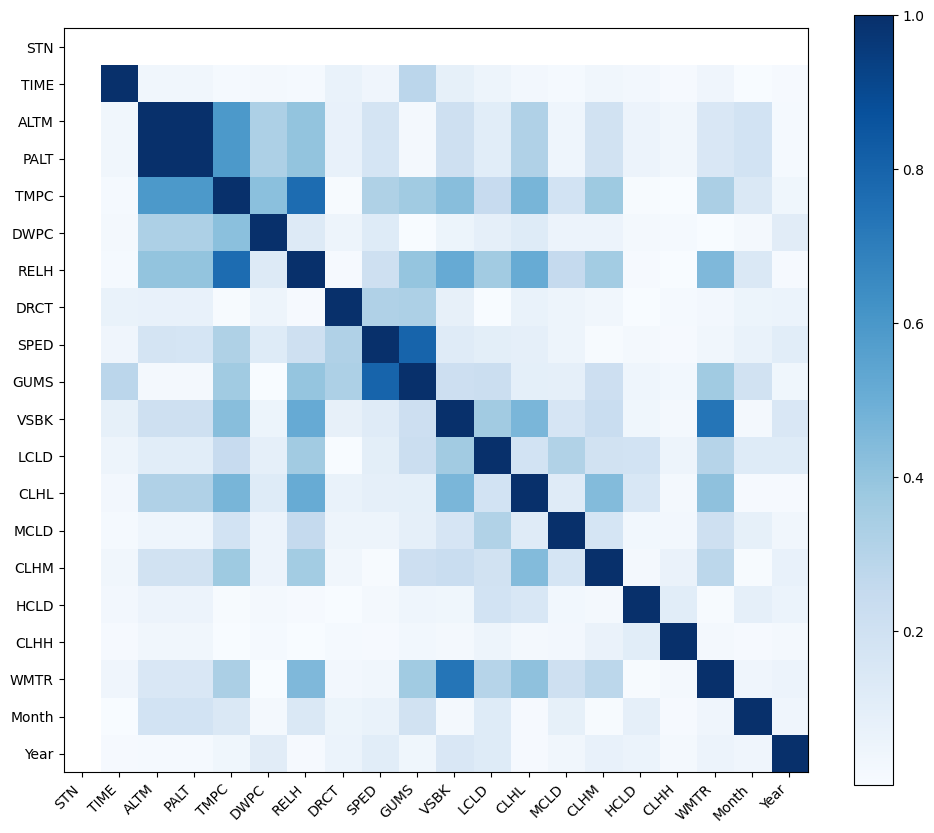

In [14]:
# نمودار قدرمطلق همبستگی
plt.figure(figsize=(12, 10))
plt.imshow(sample.corr().abs(), cmap='Blues')
plt.colorbar()

variables = []
for i in sample.corr().columns:
    variables.append(i)

plt.xticks(range(len(sample.corr())), variables, rotation=45, ha='right')
plt.yticks(range(len(sample.corr())), variables)

plt.show()

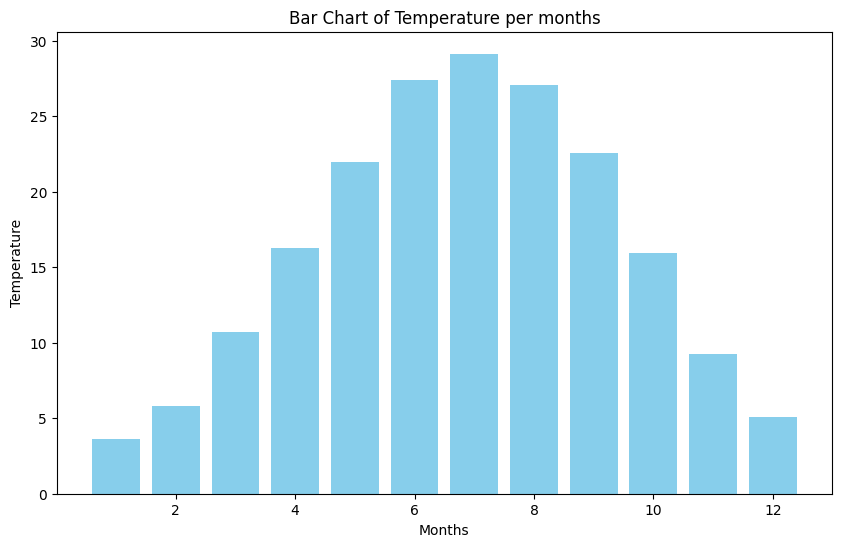

In [15]:
# میانگین دما در طول ماه های مختلف سال
value_counts = sample[['Month','TMPC']].groupby('Month').mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(value_counts['Month'], value_counts['TMPC'], color='skyblue')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.title('Bar Chart of Temperature per months')
plt.show()

In [16]:

sample['Month'] = sample['Month'].astype(int)

sort = [1, 12, 2, 11, 3, 10, 4, 5, 9, 8, 6, 7]
month_map = {month: i + 1 for i, month in enumerate(sort)}

sample['new_month'] = sample['Month'].map(month_map)


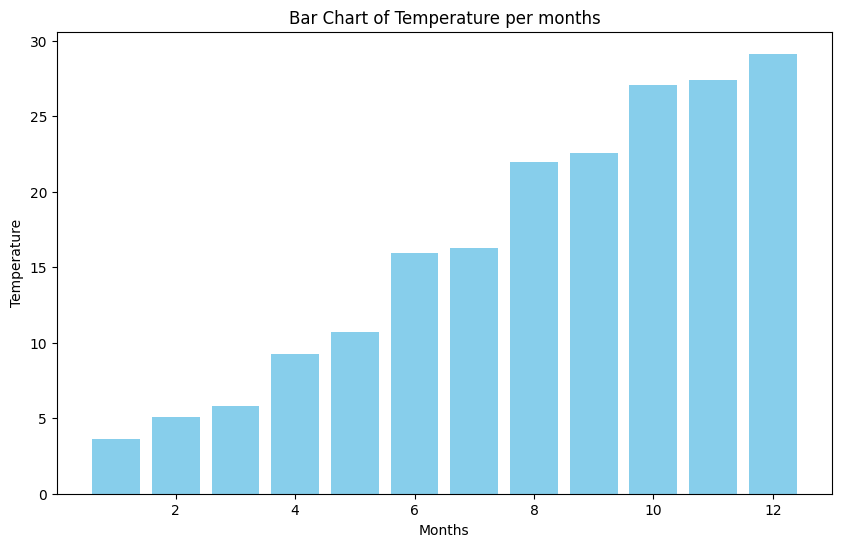

In [17]:
# میانگین دما در طول ماه های مختلف سال
value_counts = sample[['new_month','TMPC']].groupby('new_month').mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(value_counts['new_month'], value_counts['TMPC'], color='skyblue')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.title('Bar Chart of Temperature per months')
plt.show()

In [18]:
sample.corr() # مقادیر عددی میزان همبستگی به ازای ستون ها

,STN,TIME,ALTM,PALT,TMPC,DWPC,RELH,DRCT,SPED,GUMS,...,LCLD,CLHL,MCLD,CLHM,HCLD,CLHH,WMTR,Month,Year,new_month
STN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIME,NaN,1.000000,-0.031473,-0.031392,-0.014158,-0.022334,-0.012294,0.070049,0.042325,0.283796,...,0.050478,0.023621,0.012259,-0.034681,0.026522,-0.008630,0.041301,0.001590,0.010047,0.003271
ALTM,NaN,-0.031473,1.000000,0.999981,-0.592678,-0.328090,0.399896,-0.075910,-0.172079,0.016011,...,-0.105943,-0.318204,-0.044029,-0.190165,0.055964,0.032678,-0.149381,0.186352,0.013086,-0.494288
PALT,NaN,-0.031392,0.999981,1.000000,-0.592607,-0.327922,0.399900,-0.075724,-0.171835,0.016217,...,-0.105758,-0.318191,-0.043998,-0.190107,0.056024,0.032658,-0.149242,0.186164,0.014590,-0.494242
TMPC,NaN,-0.014158,-0.592678,-0.592607,1.000000,0.421758,-0.767434,0.007349,0.322429,-0.367199,...,0.243852,0.465637,0.186617,0.371205,0.005127,0.002567,0.335301,0.146850,0.036544,0.827676
DWPC,NaN,-0.022334,-0.328090,-0.327922,0.421758,1.000000,0.127065,0.048506,0.122446,0.000048,...,-0.087058,0.121392,-0.056544,0.055028,-0.015800,-0.011896,0.002630,0.022808,0.112179,0.462659
RELH,NaN,-0.012294,0.399896,0.399900,-0.767434,0.127065,1.000000,-0.010117,-0.209981,0.395544,...,-0.360877,-0.508298,-0.253243,-0.357762,0.008364,0.002936,-0.451685,-0.144653,0.010105,-0.565288
DRCT,NaN,0.070049,-0.075910,-0.075724,0.007349,0.048506,-0.010117,1.000000,0.319372,0.328060,...,-0.001384,0.068434,-0.050429,-0.031658,-0.002395,0.012421,0.025466,-0.054489,0.059485,0.012693
SPED,NaN,0.042325,-0.172079,-0.171835,0.322429,0.122446,-0.209981,0.319372,1.000000,0.800410,...,-0.099182,0.086679,-0.050581,-0.007354,-0.021739,0.009392,0.034353,-0.068808,0.105975,0.219866
GUMS,NaN,0.283796,0.016011,0.016217,-0.367199,0.000048,0.395544,0.328060,0.800410,1.000000,...,-0.219401,-0.091041,-0.088538,-0.213688,-0.043651,0.028716,-0.365104,-0.193609,-0.035564,-0.305968


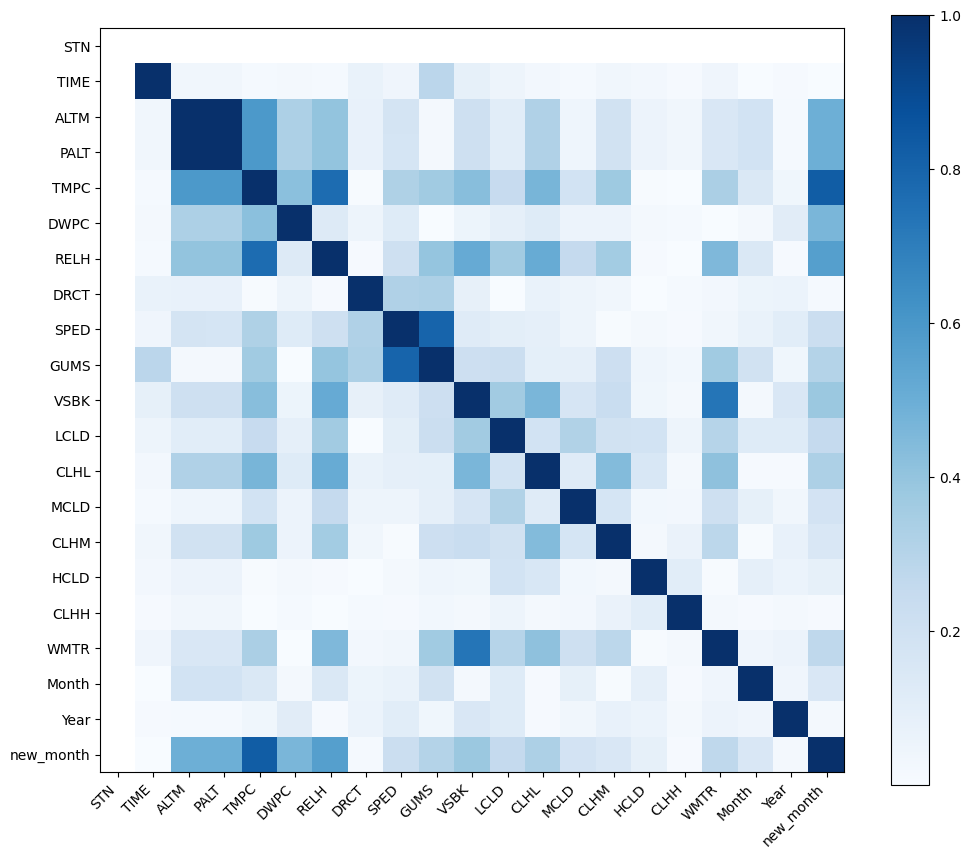

In [19]:
# نمودار قدرمطلق همبستگی
plt.figure(figsize=(12, 10))
plt.imshow(sample.corr().abs(), cmap='Blues')
plt.colorbar()

variables = []
for i in sample.corr().columns:
    variables.append(i)

plt.xticks(range(len(sample.corr())), variables, rotation=45, ha='right')
plt.yticks(range(len(sample.corr())), variables)

plt.show()

اگر ترتیب ماه ها به صورت صعودی نسبت به میانگین دما باشند همبستگی بیشتری را دریافت میکنیم
1,12,2,11,3,10,4,5,9,8,6,7
برای مثال در بالا ترتیب جدید را در ستون new_month ایجاد کردیم و کوریلیشن آن با دما از 0.14 به 0.82 تغییر پیدا کرد همچنین با دیگر فیچر ها نیز تغییر کرد

### الگو های فصلی برای میزان دید

In [20]:
data.set_index('DATE', inplace=True)

In [21]:
seasonal_data = data['VSBK'].dropna().astype(float).resample('QE').mean()

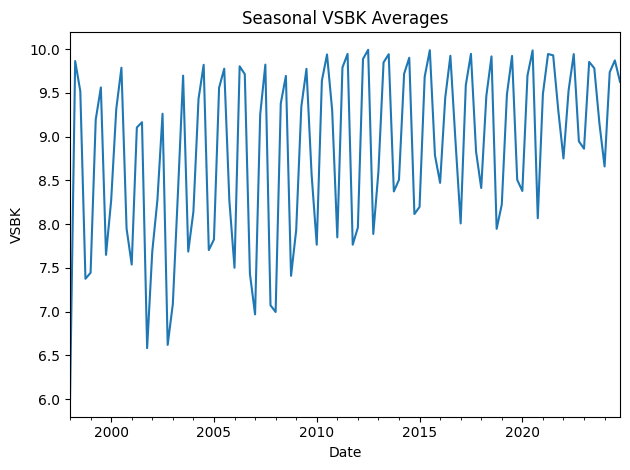

In [22]:
seasonal_data.plot(title='Seasonal VSBK Averages')
plt.xlabel('Date')
plt.ylabel('VSBK')

plt.tight_layout()
plt.show()


### ارتباط سرعت باد با ارتفاع ابر ها

In [23]:
# همبستگی سرعت باد با ارتفاع ابر ها
data[['SPED','CLHL','CLHM','CLHH']].astype(float).corr()['SPED']

,SPED
SPED,1.000000
CLHL,0.086679
CLHM,-0.007354
CLHH,0.009392


In [24]:
# همبستگی سرعت باد با میانگین ارتفاع ابر ها
np.corrcoef(data.dropna(subset=['SPED', 'CLHL', 'CLHM', 'CLHH'])['SPED'].astype(float),data.dropna(subset=['SPED', 'CLHL', 'CLHM', 'CLHH'])[['CLHL','CLHM','CLHH']].astype(float).mean(axis=1))

array([[ 1.        , -0.02023584],
       [-0.02023584,  1.        ]])

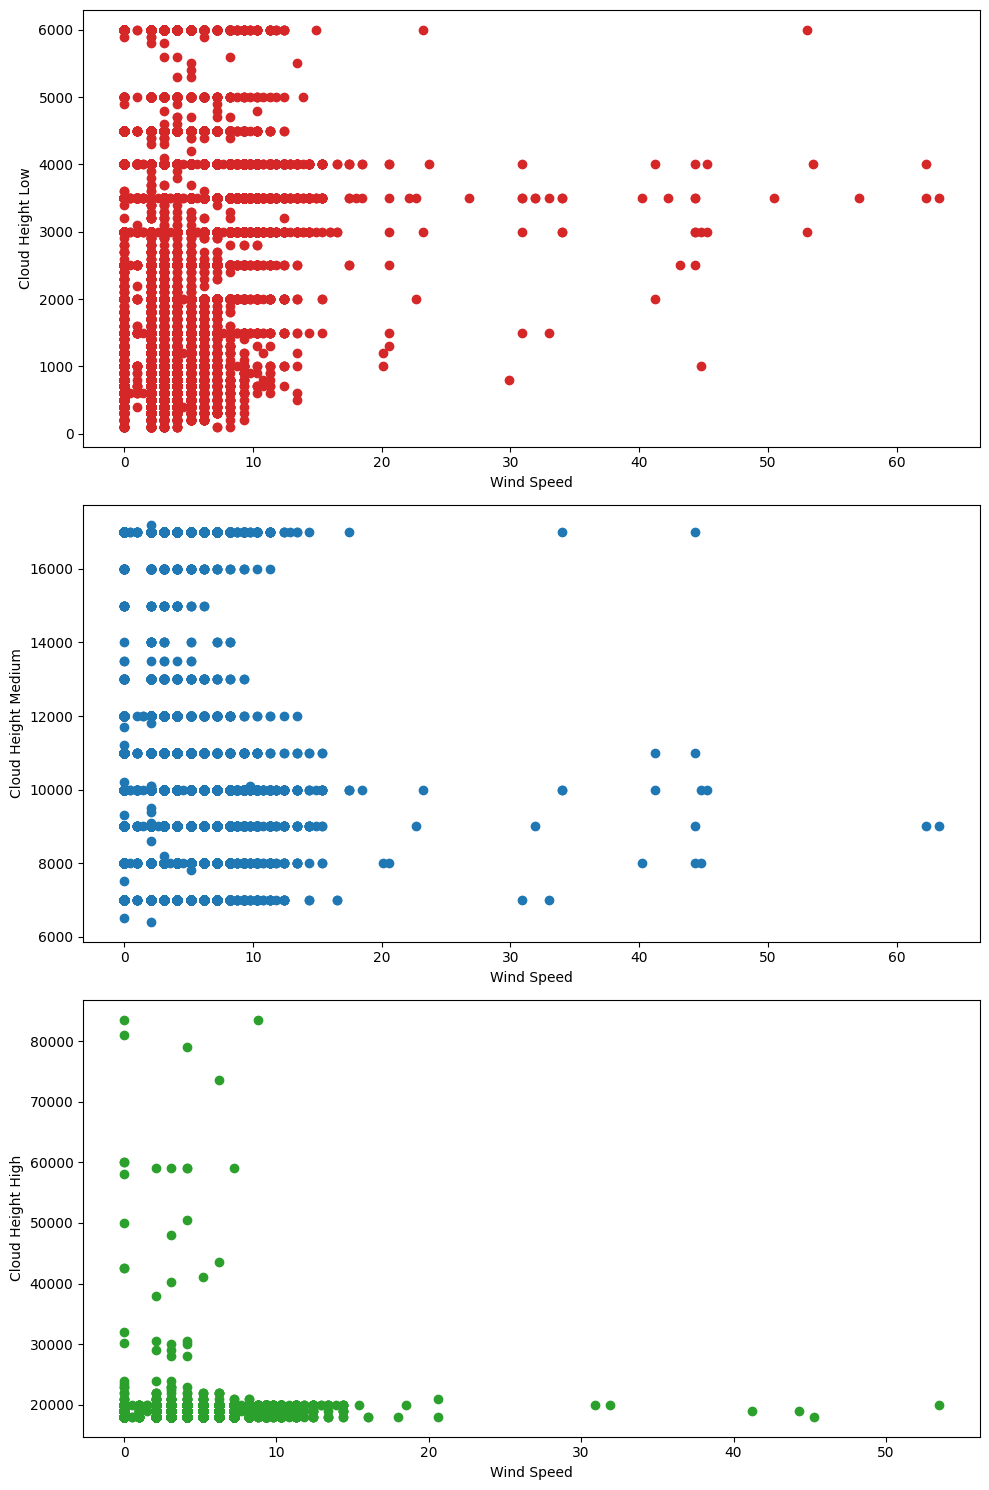

In [25]:
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(10, 15))
ax1.scatter(data['SPED'].astype(float), data['CLHL'].astype(float), color='tab:red')
ax1.set_xlabel('Wind Speed')
ax1.set_ylabel('Cloud Height Low')

ax2.scatter(data['SPED'].astype(float), data['CLHM'].astype(float), color='tab:blue')
ax2.set_xlabel('Wind Speed')
ax2.set_ylabel('Cloud Height Medium')

ax3.scatter(data['SPED'].astype(float), data['CLHH'].astype(float), color='tab:green')
ax3.set_xlabel('Wind Speed')
ax3.set_ylabel('Cloud Height High')

plt.tight_layout()
plt.show()


از پلات های بالا و مقادیر همبستگی سرعت باد با ارتفاع ابر ها میتوان نتیجه گرفت سرعت باد با ارتفاع ابر ها ارتباط بسیار بسیار کمی دارد (این ارتباط در ارتفاع ابر های پایین کمی بیشتر است)

### گزارش کامل از میانگین و واریانس تمام داده ها به تفکیک هر ماه هر سال

In [26]:
mean = data[['ALTM','PALT','TMPC','DWPC','RELH','DRCT','SPED','GUMS','VSBK','CLHL','CLHM','CLHH','Year','Month']].astype(float).groupby(['Year','Month']).mean().reset_index()
var = data[['ALTM','PALT','TMPC','DWPC','RELH','DRCT','SPED','GUMS','VSBK','CLHL','CLHM','CLHH','Year','Month']].astype(float).groupby(['Year','Month']).var().reset_index()

In [27]:
summary_df = pd.concat([mean, var], axis=1, keys=['Mean', 'Variance'])

In [28]:
summary_df

Mean                                                                   \
       Year Month         ALTM        PALT       TMPC       DWPC        RELH   
0    1998.0   2.0  1016.900000  904.200000   2.000000   2.000000  100.000000   
1    1998.0   5.0  1008.425926  896.633333  18.703704  13.148148   72.814815   
2    1998.0   6.0  1013.663415  901.287805  27.216867   9.590361   33.867470   
3    1998.0   8.0  1014.231194  901.794652  26.674377   9.446619   35.516014   
4    1998.0   9.0  1016.255825  903.590469  21.847662   7.064955   39.953172   
..      ...   ...          ...         ...        ...        ...         ...   
313  2024.0   6.0  1013.952286  901.560835  27.163022  12.435388   41.807157   
314  2024.0   7.0  1010.745163  898.696398  28.762508  13.957972   41.628419   
315  2024.0   8.0  1013.985026  901.583203  27.767578  12.188151   39.510417   
316  2024.0   9.0  1017.874389  905.040823  21.245639   6.022331   39.115841   
317  2024.0  10.0  1019.614344  906.595873  16.343031   7.556834   58.834912   

                                      ...   Variance                         \
           DRCT      SPED       GUMS  ...       TMPC       DWPC        RELH   
0    180.000000  4.100000        NaN  ...        NaN        NaN         NaN   
1    225.185185  4.270370        NaN  ...  11.293447   2.592593  310.925926   
2    136.385542  3.938554        NaN  ...  20.415810   3.439906   48.091978   
3    158.859180  3.715330        NaN  ...  22.494494   9.784133  132.410617   
4    154.550989  3.065449        NaN  ...  34.491864  18.018467  112.758772   
..          ...       ...        ...  ...        ...        ...         ...   
313  156.474486  3.808217  10.000000  ...  20.365979   8.007261  144.204829   
314  140.213618  3.738559  11.250000  ...  19.633814   6.932144  108.292409   
315  135.923027  3.770573  10.166667  ...  24.987639  14.818648  113.550380   
316  137.857641  3.464410  11.000000  ...  29.633754  15.183859  152.895789   
317  132.550744  2.617388        NaN  ...  40.285094   7.422292  254.285524   

                                                                               \
             DRCT      SPED       GUMS      VSBK           CLHL          CLHM   
0             NaN       NaN        NaN       NaN            NaN           NaN   
1    16533.618234  3.169088        NaN  1.333333  198717.948718  8.333333e+04   
2    16064.825154  7.449715        NaN  0.317367   70135.746606           NaN   
3    11767.624777  5.954300        NaN  0.893838   98320.574163  7.536232e+05   
4     8723.311802  3.829612        NaN  2.003175  110944.338458  0.000000e+00   
..            ...       ...        ...       ...            ...           ...   
313  11734.379488  4.828871   0.000000  0.243824   82808.723383  9.760000e+06   
314   8691.337102  7.463158  10.916667  0.348246  111610.320285  1.114824e+07   
315   6904.059345  4.978208   0.166667  0.820910   87688.172043  1.166256e+07   
316   6902.879161  4.388230   8.000000  0.289893  107420.634921  6.054907e+06   
317   8264.782461  2.942426        NaN  1.231187  851652.705456  7.035643e+06   

                   
             CLHH  
0             NaN  
1    0.000000e+00  
2             NaN  
3    0.000000e+00  
4    2.619048e+05  
..            ...  
313  8.281707e+05  
314  6.666667e+05  
315  2.000000e+06  
316  4.705882e+05  
317  6.920635e+05  

[318 rows x 28 columns]

### مدل رگرسیون برای پیشبینی

In [29]:
!pip install category_encoders

In [30]:
!pip install scikit-learn==1.4.0

In [31]:
import category_encoders as ce

In [32]:
encoder = ce.TargetEncoder()

In [33]:
data['TIME'] = pd.to_datetime(data['TIME'].apply(lambda x: f"{x[:2]}:{x[2:]}"), format='%H:%M').dt.time

In [34]:
data[['STN','TIME','LCLD','MCLD','HCLD','WMTR']] = encoder.fit_transform(data[['STN','TIME','LCLD','MCLD','HCLD','WMTR']] ,data['TMPC'] )

In [35]:
data[data.select_dtypes(include=['object']).columns] = data[data.select_dtypes(include=['object']).columns].astype(float)

In [37]:
data.corr()['TMPC']

,TMPC
STN,NaN
TIME,0.349856
ALTM,-0.592678
PALT,-0.592607
TMPC,1.000000
DWPC,0.421758
RELH,-0.767434
DRCT,0.007349
SPED,0.322429
GUMS,-0.367199


بهترین فیچر ها : RELH , DWPC , ALTM , CLHL , VSBK , WMTR , LCLD , SPED , GUMS , MCLD , CLHM , TIME

In [86]:
x_train = data[['RELH' , 'DWPC' , 'ALTM' , 'CLHL' , 'VSBK' , 'WMTR' , 'LCLD' , 'SPED' , 'GUMS' , 'MCLD' , 'CLHM','TIME']][~((data['Year'] == 2024) & (data['Month'] == 10))]

In [87]:
y_train = data['TMPC'][~((data['Year'] == 2024) & (data['Month'] == 10))]

In [88]:
x_test = data[['RELH' , 'DWPC' , 'ALTM' , 'CLHL' , 'VSBK' , 'WMTR' , 'LCLD' , 'SPED' , 'GUMS' , 'MCLD' , 'CLHM','TIME']][(data['Year'] == 2024) & (data['Month'] == 10)]

In [89]:
y_test = data['TMPC'][(data['Year'] == 2024) & (data['Month'] == 10)]

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
model = RandomForestRegressor().fit(x_train,y_train)

In [92]:
model.score(x_train,y_train)

0.9501082735551158

In [93]:
model.score(x_test,y_test)

0.9429549519451722

### ماکزیمم متوسط دمای سالانه

In [139]:
from scipy import stats

In [140]:
yearAvg = data[['Year','TMPC']].groupby('Year').mean().reset_index()

In [141]:
max = yearAvg.loc[yearAvg['TMPC'].idxmax()]

In [142]:
max

,26
Year,2024.000000
TMPC,18.081224


بالاترین میانگین دما مربوط به سال 2024 است و مقدار ان 18.08 است

In [145]:
group_a = yearAvg[yearAvg['Year'] == max['Year']]['TMPC']
group_b = yearAvg[yearAvg['Year'] != max['Year']]['TMPC']

In [146]:
t_stat, p_value = stats.ttest_ind(group_a,group_b)

In [147]:
print(f"Max Average Temperature Year: {max['Year']}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

Max Average Temperature Year: 2024.0
T-statistic: 2.9878484730197328
P-value: 0.006216946387671344


از این تست میتوان نتیجه گرفت که بخاطر وجود مقدار P-value کم و T-statistic بالا تفاوت معنا داری بین میانگین ها وجود دارد و احتمال تصادفی بودن آن بسیار کم است

In [148]:
yearAvg23 = data[['Year','TMPC']][data['Year']!=2024].groupby('Year').mean().reset_index()

In [149]:
max23 = yearAvg23.loc[yearAvg23['TMPC'].idxmax()]

In [150]:
max23

,12
Year,2010.000000
TMPC,17.641292


به دلیل کامل نبودن دیتای کل سال 2024 در این قسمت سال 2024 را نادیده گرفتیم و بالا ترین دما متعلق به سال 2010 و مقدار آن 17.64 است

In [151]:
group_a23 = yearAvg23[yearAvg23['Year'] == max23['Year']]['TMPC']
group_b23 = yearAvg23[yearAvg23['Year'] != max23['Year']]['TMPC']

In [152]:
t_stat23, p_value23 = stats.ttest_ind(group_a23,group_b23)

In [153]:
print(f"Max Average Temperature Year: {max23['Year']}")
print(f"T-statistic: {t_stat23}")
print(f"P-value: {p_value23}")

Max Average Temperature Year: 2010.0
T-statistic: 2.6768568843567624
P-value: 0.013187107079719337


از این نیز تست میتوان نتیجه گرفت که بخاطر وجود مقدار P-value کم و T-statistic بالا تفاوت معنا داری بین میانگین ها وجود دارد و احتمال تصادفی بودن آن بسیار کم است